In [13]:
from sklearn.datasets import load_wine
raw_wine = load_wine()

In [14]:
X = raw_wine.data
y = raw_wine.target

In [24]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_tn_std, y_tn)
X_tn_lda = lda.transform(X_tn_std)
X_te_lda = lda.transform(X_te_std)

In [27]:
print(X_tn_std.shape)
print(X_te_lda.shape)

(133, 13)
(45, 2)


In [28]:
# LDA 상수항, 가중 벡터 확인
print(lda.intercept_)
print(lda.coef_)

[-10.43672342  -4.06646567 -11.86481563]
[[ 2.08067239e+00  9.35053476e-03  1.21559585e+00 -2.93109927e+00
   9.76489959e-02 -2.70947375e+00  8.33641080e+00  9.59274709e-01
  -1.31511222e+00 -1.57641572e+00  6.01209963e-02  4.16138211e+00
   4.94293451e+00]
 [-1.50898343e+00 -1.03364308e+00 -1.42513305e+00  1.31234341e+00
  -8.24060552e-03  3.10104765e-01  4.63726906e-01  1.19450044e-01
   7.45392589e-01 -1.48434856e+00  8.54448096e-01  1.72053276e-01
  -2.18465736e+00]
 [-3.50493538e-01  1.28200202e+00  4.74650776e-01  1.51050245e+00
  -9.46719137e-02  2.52505333e+00 -9.54130024e+00 -1.18053287e+00
   4.82004904e-01  3.55008261e+00 -1.13269019e+00 -4.68855236e+00
  -2.58283290e+00]]


In [29]:
import pandas as pd
lda_columns = ['lda_comp1', 'lda_comp2']
X_tn_lda_df = pd.DataFrame(X_tn_lda, columns=lda_columns)
X_tn_lda_df['target'] = y_tn
X_tn_lda_df.head()

,lda_comp1,lda_comp2,target
0,-3.757230,1.782242,0
1,3.717800,0.855757,2
2,-0.044172,-2.022490,1
3,3.502951,1.999101,2
4,-3.875662,2.650775,0


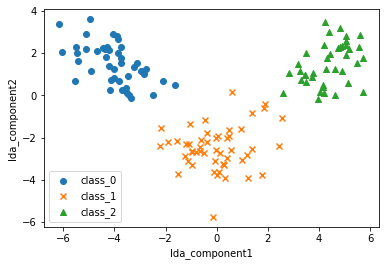

In [30]:
import matplotlib.pyplot as plt
df = X_tn_lda_df
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['lda_comp1']
    X2 = X_i['lda_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)

plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf_rf_lda = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_lda.fit(X_tn_lda, y_tn)
pred_rf_lda = clf_rf_lda.predict(X_te_lda)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_lda)
accuracy

0.9777777777777777